## import necessary library

In [1]:
import pandas as pd

### Task 1 merge all 12 months sales data into 1 csv file

In [2]:
import glob

path = r'./Sales_Data'
all_files = glob.glob(path + "/*.csv")
all_files

['./Sales_Data/Sales_December_2019.csv',
 './Sales_Data/Sales_April_2019.csv',
 './Sales_Data/Sales_February_2019.csv',
 './Sales_Data/Sales_March_2019.csv',
 './Sales_Data/Sales_August_2019.csv',
 './Sales_Data/Sales_May_2019.csv',
 './Sales_Data/Sales_November_2019.csv',
 './Sales_Data/Sales_October_2019.csv',
 './Sales_Data/Sales_January_2019.csv',
 './Sales_Data/Sales_September_2019.csv',
 './Sales_Data/Sales_July_2019.csv',
 './Sales_Data/Sales_June_2019.csv']

In [3]:
for f in all_files:
    df = pd.read_csv(f)
    print(df.shape)

(25117, 6)
(18383, 6)
(12036, 6)
(15226, 6)
(12011, 6)
(16635, 6)
(17661, 6)
(20379, 6)
(9723, 6)
(11686, 6)
(14371, 6)
(13622, 6)


In [4]:
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv("merged.csv", index=False)

In [5]:
# take a look at the merged csv
merged = pd.read_csv('merged.csv')
#merged.reset_index(drop=True, inplace=True)
merged.shape

(186850, 6)

In [6]:
merged.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


### Drop NAN rows

In [7]:
nan = merged[merged.isna().any(axis = 1)]
nan.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merged.dropna(how='all', inplace=True)

In [9]:
# there is no nan rows after dropping
merged[merged.isna().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## Question1 What was the best month for sales? How much was earned that month?

### Add Month Column

In [10]:
merged['Month of Order'] = merged['Order Date'].str[:2]
merged = merged[merged['Month of Order'] != 'Or']
merged.reset_index(inplace=True)
merged['Month of Order'] = merged['Month of Order'].astype('int32')
merged.head(300)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month of Order
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...,...
295,297,295941,ThinkPad Laptop,1,999.99,12/31/19 16:24,"64 Dogwood St, Portland, OR 97035",12
296,298,295942,Google Phone,1,600,12/30/19 19:21,"150 North St, Boston, MA 02215",12
297,299,295943,AAA Batteries (4-pack),3,2.99,12/04/19 13:32,"701 Sunset St, Dallas, TX 75001",12
298,300,295944,27in 4K Gaming Monitor,1,389.99,12/29/19 17:04,"175 Main St, San Francisco, CA 94016",12


### turning two columns into numeric value so that multiplication can be done

In [11]:
merged['Price Each'] = pd.to_numeric(merged['Price Each'])
merged['Quantity Ordered'] = pd.to_numeric(merged['Quantity Ordered'])


In [12]:
merged['Total Price'] = merged['Price Each']*merged['Quantity Ordered']
merged.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month of Order,Total Price
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [13]:
sales_per_month = merged.groupby('Month of Order')['Total Price'].sum()
sales_per_month.sort_values(ascending=False)

Month of Order
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Total Price, dtype: float64

### So December is the month with highest sales with $4,613,443.34 sales

### Its important to visualize the result

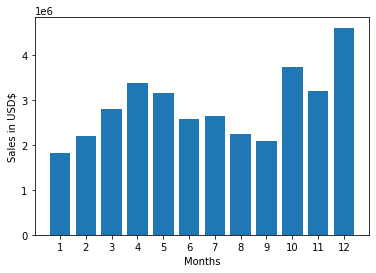

In [14]:
import matplotlib.pyplot as plt

plt.bar(range(1,13), sales_per_month)
plt.xticks(range(1,13))
plt.ylabel('Sales in USD$')
plt.xlabel('Months')
plt.show()

Text(0, 0.5, 'Sales in USD')

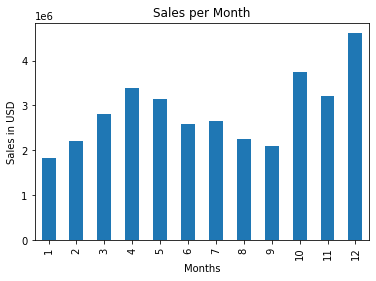

In [15]:
ax = sales_per_month.plot.bar(title='Sales per Month')
ax.set_xlabel('Months')
ax.set_ylabel('Sales in USD')

## Question 2 What city sold the most product?

### create column City

In [16]:
merged['City'] = merged['Purchase Address'].apply(lambda x: x.split(',')[1])
merged['City']

0          New York City
1          New York City
2          New York City
3          San Francisco
4                Atlanta
               ...      
185945            Boston
185946     New York City
185947     San Francisco
185948     San Francisco
185949           Atlanta
Name: City, Length: 185950, dtype: object

In [17]:
sales_per_city = merged.groupby('City')['Total Price'].sum()
sales_per_city.sort_values(ascending=False)

City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: Total Price, dtype: float64

### So the city with the most sales in one year is San Francisco

<AxesSubplot:title={'center':'Sales per City'}, xlabel='City'>

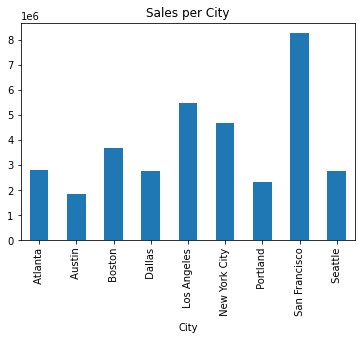

In [18]:
ax = sales_per_city.plot.bar(title='Sales per City')
ax

### Its possible that there are cities with same name
### so the state of the cities should also be included

In [19]:
merged['State'] = merged['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])
#merged['State']
merged['City'] = merged['City']+ " " + merged['State']
merged['City']
#merged['State']


0          New York City NY
1          New York City NY
2          New York City NY
3          San Francisco CA
4                Atlanta GA
                ...        
185945            Boston MA
185946     New York City NY
185947     San Francisco CA
185948     San Francisco CA
185949           Atlanta GA
Name: City, Length: 185950, dtype: object

In [20]:
sales_per_city = merged.groupby('City')['Total Price'].sum()
sales_per_city.sort_values(ascending=False)

City
 San Francisco CA    8262203.91
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Boston MA           3661642.01
 Atlanta GA          2795498.58
 Dallas TX           2767975.40
 Seattle WA          2747755.48
 Portland OR         1870732.34
 Austin TX           1819581.75
 Portland ME          449758.27
Name: Total Price, dtype: float64

<AxesSubplot:title={'center':'Sales per City'}, xlabel='City'>

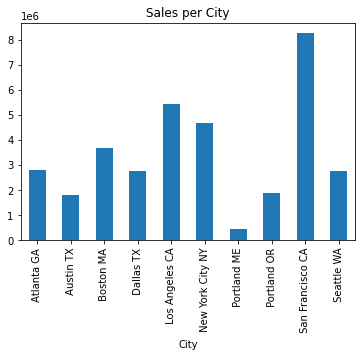

In [21]:
ax = sales_per_city.plot.bar(title='Sales per City')
ax

### After separating the name of the cities, San Francisco is still the city with highest sales

## Question 3 What time should we display advertisements to maximize likelihood of customer's buying product?

### turn order date column into a date time object

In [22]:
merged['Order Date'] = pd.to_datetime(merged['Order Date'])
merged.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month of Order,Total Price,City,State
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,NY
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,NY
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,NY
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,CA
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,GA


In [23]:
merged['Hour'] = merged['Order Date'].dt.hour
merged['Minute'] = merged['Order Date'].dt.minute
merged.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month of Order,Total Price,City,State,Hour,Minute
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,NY,0,1
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,NY,7,3
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,NY,18,21
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,CA,15,13
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,GA,12,38


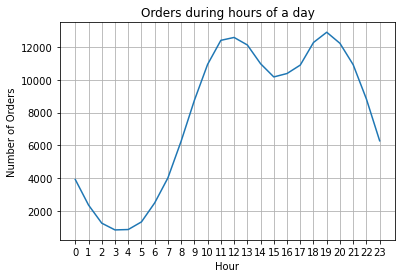

In [24]:
sales_per_hour = merged.groupby('Hour')['Order ID'].count()
ax = sales_per_hour.plot(title='Orders during hours of a day')
ax.set_xticks(range(24))
ax.set_ylabel('Number of Orders')
ax.grid()


### the result is during around 10-11 and 18-19 sales reach peak

## Question 4 What products are most often sold together?

### to see what products sold together, use groupby Order ID

In [31]:
sales_per_ID = merged.groupby(['Order ID'])['Product'].count().reset_index()
sales_per_ID = sales_per_ID[sales_per_ID.Product != 1]
sales_per_ID.head()

,Order ID,Product
41,141275,2
56,141290,2
131,141365,2
150,141384,2
216,141450,2


In [26]:
merged.shape

(185950, 13)

In [27]:
sold_together = pd.merge(merged, sales_per_ID, how='inner', on=['Order ID'])
sold_together

,index,Order ID,Product_x,Quantity Ordered,Price Each,Order Date,Purchase Address,Month of Order,Total Price,City,State,Hour,Minute,Product_y
0,16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston MA,MA,12,37,4
1,17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston MA,MA,12,37,4
2,18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston MA,MA,12,37,4
3,19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston MA,MA,12,37,4
4,36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City NY,NY,14,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14644,186820,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles CA,CA,11,37,2
14645,186822,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,600.00,New York City NY,NY,12,6,2
14646,186823,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,11.95,New York City NY,NY,12,6,2
14647,186842,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6,700.00,New York City NY,NY,22,21,2


In [28]:
sold_together.groupby(['Order ID','Product_x']).count()
sold_together.head()

,index,Order ID,Product_x,Quantity Ordered,Price Each,Order Date,Purchase Address,Month of Order,Total Price,City,State,Hour,Minute,Product_y
0,16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston MA,MA,12,37,4
1,17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston MA,MA,12,37,4
2,18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston MA,MA,12,37,4
3,19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston MA,MA,12,37,4
4,36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City NY,NY,14,32,2


In [29]:
sold_together['Grouped'] = sold_together.groupby('Order ID')['Product_x'].transform(lambda x: ','.join(x))
sold_together

,index,Order ID,Product_x,Quantity Ordered,Price Each,Order Date,Purchase Address,Month of Order,Total Price,City,State,Hour,Minute,Product_y,Grouped
0,16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston MA,MA,12,37,4,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
1,17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston MA,MA,12,37,4,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
2,18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston MA,MA,12,37,4,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
3,19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston MA,MA,12,37,4,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
4,36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City NY,NY,14,32,2,"Vareebadd Phone,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14644,186820,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles CA,CA,11,37,2,"Apple Airpods Headphones,AA Batteries (4-pack)"
14645,186822,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,600.00,New York City NY,NY,12,6,2,"Google Phone,USB-C Charging Cable"
14646,186823,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,11.95,New York City NY,NY,12,6,2,"Google Phone,USB-C Charging Cable"
14647,186842,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6,700.00,New York City NY,NY,22,21,2,"iPhone,Lightning Charging Cable"


In [47]:
sold_together = sold_together[['Order ID', 'Grouped']].drop_duplicates()
sold_together.head(50)

,Order ID,Grouped
0,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
4,295698,"Vareebadd Phone,USB-C Charging Cable"
6,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
8,295726,"iPhone,Lightning Charging Cable"
10,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
13,295737,"iPhone,Lightning Charging Cable"
15,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
17,295759,"Bose SoundSport Headphones,Wired Headphones"
19,295783,"Vareebadd Phone,USB-C Charging Cable"
21,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [46]:
pairs_count = sold_together.groupby('Grouped').count()
pairs_count.rename(columns={'Order ID':'Number of Orders'}, inplace=True)
pairs_count['Number of Orders'].sort_values(ascending=False)


Grouped
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
                                                     ... 
LG Dryer,27in FHD Monitor                               1
LG Dryer,27in 4K Gaming Monitor                         1
Google Phone,Wired Headphones,USB-C Charging Cable      1
Google Phone,Wired Headphones,Macbook Pro Laptop        1
iPhone,iPhone                                           1
Name: Number of Orders, Length: 366, dtype: int64

### The Most Ordered pair of product is iPhone and Lighting Charging Cable with Number of Orders of 882

## Question 5 What product sold the most?

In [48]:
merged.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month of Order,Total Price,City,State,Hour,Minute
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,NY,0,1
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,NY,7,3
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,NY,18,21
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,CA,15,13
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,GA,12,38


<AxesSubplot:xlabel='Product'>

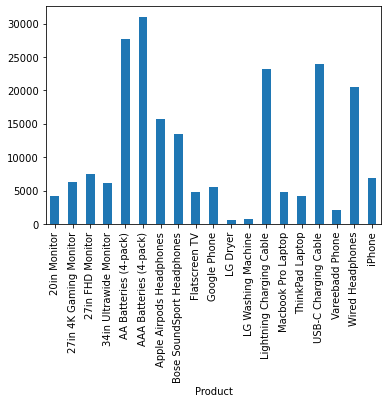

In [51]:
product_sold = merged.groupby(['Product'])['Quantity Ordered'].sum()
product_sold.plot.bar()

### Does the price of the product affects the sales?

<AxesSubplot:>

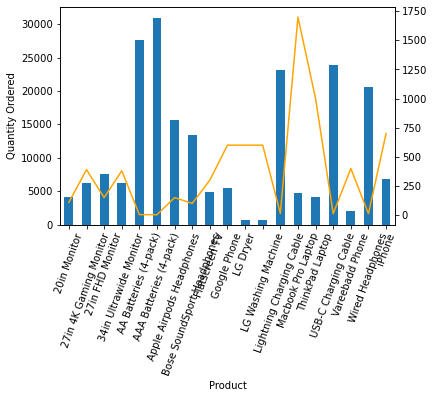

In [74]:
Prices = merged.groupby('Product')['Price Each'].mean()
product_sold.plot.bar(ylabel='Quantity Ordered')
Prices.plot(secondary_y=True, rot=70, color='orange')